In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt #plotting
import librosa.display #audio data show
import os
import pandas as pd
import librosa
import glob 
import numpy as np
import random

**Load Data**

In [ ]:
import librosa
audio_file_path='/content/drive/MyDrive/DataMining/Datasets/Minimal/rec01.mp3'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path) #analog to digital-sampling rate , sampling r por data list e pabo
print(librosa_audio_data)
print("Audio data :", len(librosa_audio_data)) #array length
print("Sample Rate :", librosa_sample_rate)   #value

[ 6.1650295e-04  1.1957149e-03  9.4666175e-04 ... -7.4860523e-08
  5.7690094e-08  0.0000000e+00]
Audio data : 23307
Sample Rate : 22050


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


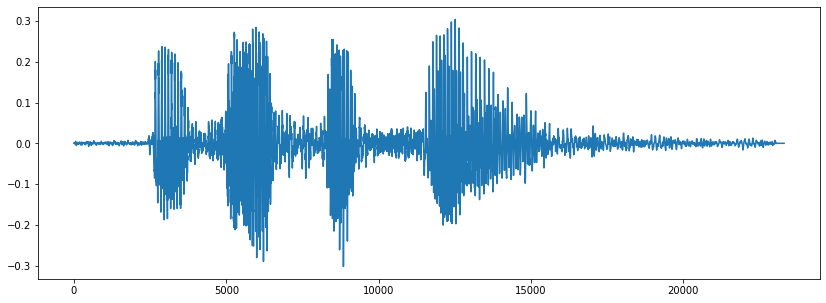

In [ ]:
# Original audio with 1 channel 
plt.figure(figsize=(14, 5))
plt.plot(librosa_audio_data)

In [ ]:
import librosa
# Trim the beginning and ending silence
trimed_librosa_audio_data, index = librosa.effects.trim(librosa_audio_data)
# Print the durations
print(len(trimed_librosa_audio_data))
print(len(librosa_audio_data))
print(librosa.get_duration(trimed_librosa_audio_data), librosa.get_duration(librosa_audio_data))

23307
23307
1.0570068027210884 1.0570068027210884


In [ ]:
y_harm, y_perc = librosa.effects.hpss(trimed_librosa_audio_data)
print(len(y_harm))
print(len(y_perc))

23307
23307


**Extract Features**

*   Mel-Frequency Cepstral Coefficients(MFCC)
*   Zero Crossing Rate(the rate at which the signal changes from positive to negative or back.)
*   Harmonics and Perceptrual
*   Tempo BMP (beats per minute)
*   Spectral Centroid
*   Spectral Rolloff
*   Chroma Frequencies










In [ ]:
mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40) #40 - koto boro length r feature array chai
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) #mean-normalization

extracted_features=[]
extracted_features.append([mfccs_scaled_features])
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature'])
extracted_features_df.head()

feature
0  [-345.9266, 145.2937, 18.525759, 8.906574, -14...

In [ ]:
import os
from os import listdir
from os.path import join, isfile
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np

datasetdir = '/content/drive/MyDrive/DataMining/Datasets'
os.chdir(datasetdir) #chng directory- directory chng hoye sound dataset ase
curr_path = os.path.join(datasetdir, 'Mild')
files = [f for f in listdir(curr_path) if isfile(join(curr_path, f))]
print(files)

['rec02.mp3', 'rec06.mp3', 'rec14.mp3', 'rec15.mp3', 'rec18.mp3', 'rec23.mp3', 'rec27.mp3', 'rec34.mp3', 'rec35.mp3', 'rec20.mp3', '105_n.mp3', '106_n.mp3', '110_n.mp3', '111_n.mp3', '112_n.mp3', '116_n.mp3', '117_n.mp3', '118_n.mp3', '123_n.mp3', '128_n.mp3', '129_n.mp3', '131_n.mp3', '132_n.mp3', 'rec37_n.mp3', 'rec38_n.mp3', 'rec40_n.mp3', 'rec41_n.mp3', '101_n.mp3', 'rec47_n.mp3', '102_n.mp3', 'rec53_n.mp3', 'rec52_n.mp3', 'rec57_n.mp3', '104_n.mp3', 'rec61_n.mp3', 'rec65_n.mp3', 'rec68_n.mp3', 'rec69_n.mp3', 'rec72_n.mp3', 'rec76_n.mp3', 'rec77_n.mp3', 'rec80_n.mp3', 'rec83_n.mp3', 'rec88_n.mp3', 'rec90_n.mp3', 'rec98_n.mp3', 'rec96_n.mp3', 'rec93_n.mp3', '136_n.mp3', '138_n.mp3', '141_n.mp3', '145_n.mp3', '153_n.mp3', '157_n.mp3', '158_n.mp3', '159_n.mp3', '160_n.mp3', '161_n.mp3', '163_n.mp3', '164_n.mp3', '169_n.mp3', '171_n.mp3', '173_n.mp3', '174_n.mp3', '175_n.mp3', '177_n.mp3', '178_n.mp3', '179_n.mp3', '150_n.mp3', '154_n.mp3', '180_n.mp3', '181_n.mp3', '182_n.mp3', '183_n

In [ ]:
from librosa.core.harmonic import harmonics_2d
from itertools import chain
classes = ['Minimal', 'Mild', 'Moderate', 'Extreme']
#classes = ['angry', 'disgusting', 'fear', 'happy', 'neutral', 'sad']
extracted_features=[]
for i in range(len(classes)):
  curr_path = os.path.join(datasetdir, classes[i])
  files = [f for f in listdir(curr_path) if isfile(join(curr_path, f))]
  for j in range(0,len(files)):
    librosa_audio_data, librosa_sample_rate = librosa.load(curr_path+"/"+files[j])
    # print(len(librosa_audio_data))
    # print(librosa_sample_rate)
    trimed_librosa_audio_data, index = librosa.effects.trim(librosa_audio_data)
    mfccs_features = librosa.feature.mfcc(y=trimed_librosa_audio_data, sr=librosa_sample_rate)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) 
    mfccs_scaled_features = list(mfccs_scaled_features)
    harmonics, perceptrual = librosa.effects.hpss(trimed_librosa_audio_data)
    harmonics = list(harmonics)
    perceptrual = list(perceptrual)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(trimed_librosa_audio_data)
    zero_crossing_rate = list(chain.from_iterable(zero_crossing_rate)) #flattening
    S, phase = librosa.magphase(librosa.stft(trimed_librosa_audio_data))
    spectral_rollof = librosa.feature.spectral_rolloff(S=S, sr=librosa_sample_rate)
    spectral_rollof = list(chain.from_iterable(spectral_rollof))
    spectral_flux = librosa.onset.onset_strength(y=trimed_librosa_audio_data, sr=librosa_sample_rate)
    spectral_flux = list(spectral_flux)
    pitches, magnitudes = librosa.piptrack(y=trimed_librosa_audio_data, sr=librosa_sample_rate)
    extracted_features.append([mfccs_scaled_features,harmonics,perceptrual,zero_crossing_rate,spectral_rollof,spectral_flux,classes[i]]) #2d array-serial wise

random.shuffle(extracted_features)
print(pitches)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(len(spectral_rollof))
print(len(spectral_flux))
print(len(zero_crossing_rate))
print(len(mfccs_scaled_features))
#type(spectral_rollof)
#type(spectral_flux)
#type(zero_crossing_rate)
#type(mfccs_scaled_features)

56
56
56
20


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['mfcc','harmonics','perceptrual','zerocrossingrate','spectralrolloff','spectralflux','class'])
extracted_features_df.head(40)
#extracted_features_df.to_csv('submission.csv', index=False)

mfcc  \
0   [-308.2979, 134.8457, -11.470703, -3.5993407, ...   
1   [-290.8551, 128.38113, -33.529686, 22.272097, ...   
2   [-229.2906, 118.382355, -22.072481, 7.6593895,...   
3   [-271.4821, 139.89676, -20.46525, 17.621023, 0...   
4   [-156.61615, 107.25581, -44.725212, -1.9034288...   
5   [-259.8351, 132.92775, -23.340683, 37.788036, ...   
6   [-238.54755, 140.4737, -8.800815, 21.420832, 1...   
7   [-322.9944, 138.25728, -18.949005, 24.43475, -...   
8   [-177.16238, 113.83043, -29.451374, -3.7032022...   
9   [-312.40967, 141.48146, 0.27667764, 10.058717,...   
10  [-244.80658, 162.0306, -67.61412, 21.21225, -3...   
11  [-212.79129, 138.3351, -49.49091, -3.838505, -...   
12  [-309.66556, 165.48618, -49.144104, 21.18685, ...   
13  [-198.21301, 102.09808, -50.343163, 3.578254, ...   
14  [-213.92271, 101.36701, 0.9708895, 29.759975, ...   
15  [-146.43756, 81.65551, 19.389854, 22.95052, 9....   
16  [-308.0633, 114.19253, 1.7625227, 5.613371, -2...   
17  [-310.60654, 177.27647, 5.3885593, 3.0794492, ...   
18  [-245.7461, 145.70625, -34.634823, 12.433688, ...   
19  [-182.25941, 94.063385, -10.735245, -11.277765...   
20  [-202.67189, 103.28988, -44.807594, 8.289105, ...   
21  [-176.43332, 106.35518, -61.781395, 21.91329, ...   
22  [-222.06859, 144.24799, -29.186188, 12.690224,...   
23  [-134.42316, 157.67429, -25.351727, 2.6721396,...   
24  [-345.9266, 145.2937, 18.525759, 8.906574, -14...   
25  [-300.5442, 139.88608, -14.223636, 9.098587, -...   
26  [-253.996, 139.99701, -28.039303, 4.626737, -1...   
27  [-271.71042, 154.3965, -23.375158, 24.08889, 9...   
28  [-176.69133, 92.12844, -36.02482, -2.7284844, ...   
29  [-337.15372, 156.85684, -11.556163, -0.0343451...   
30  [-159.86716, 124.60978, -73.675964, 6.037138, ...   
31  [-270.88663, 99.02766, -38.414383, 19.463284, ...   
32  [-287.0011, 185.97311, -34.115158, 0.2697739, ...   
33  [-159.72038, 143.14902, -33.024036, 7.4625278,...   
34  [-339.58707, 160.84937, -13.546113, -6.235587,...   
35  [-170.28885, 60.993465, 33.33969, 14.746716, 1...   
36  [-175.4461, 113.67268, -71.02873, 0.9341696, -...   
37  [-263.0211, 78.03449, -13.750129, 23.791025, -...   
38  [-197.23506, 116.919075, -39.839294, 4.083753,...   
39  [-180.4446, 97.57575, -62.198357, 18.919266, -...   

                                            harmonics  \
0   [-0.0015096109, -0.003006686, -0.0046001556, -...   
1   [0.00025976062, -0.00025992302, -0.0013734075,...   
2   [-0.03584919, -0.04079318, -0.041103408, -0.04...   
3   [-0.002948917, -0.0051497268, -0.003950386, -0...   
4   [-0.0159438, -0.020537354, -0.017517427, -0.01...   
5   [-0.00019158484, -0.0012922657, -0.001008755, ...   
6   [0.0069553503, 0.007138515, 0.0060844417, 0.00...   
7   [9.335704e-07, 7.6167105e-08, 3.870416e-06, 5....   
8   [0.003506073, -0.0022392012, -0.008282004, -0....   
9   [-0.0061174985, -0.005569402, -0.0038064017, -...   
10  [-0.0056122546, -0.007112794, -0.0077390173, -...   
11  [0.013988471, 0.01923365, 0.018478824, 0.01248...   
12  [-0.00013158143, -0.00026138133, -0.0006099729...   
13  [-0.003910907, 0.004133912, 0.008563313, 0.009...   
14  [-0.0012303318, 0.0010345604, -0.0007655356, -...   
15  [-0.00012941749, -0.004510092, -0.0026561848, ...   
16  [-0.00020151958, -0.0005502796, -0.00053239847...   
17  [-0.008358156, -0.0066430406, -0.005730486, -0...   
18  [-0.00875086, -0.009626285, -0.006460232, -0.0...   
19  [-0.6046806, -0.6220607, -0.5940304, -0.504556...   
20  [0.00033039143, -0.00042510504, -0.0019284979,...   
21  [-0.0026622638, -0.01651152, -0.038235888, -0....   
22  [0.04245292, 0.04829894, 0.04967314, 0.0470598...   
23  [-0.07592673, -0.07149311, -0.06737989, -0.055...   
24  [0.0005492222, 0.0010358591, 0.000886014, 0.00...   
25  [0.0012955663, 0.0024390935, 0.0018540309, 0.0...   
26  [0.0031433199, 0.0058377697, 0.0055150627, 0.0...   
27  [0.006200266, 0.010944234, 0.012830359, 0.0126...   
28  [0.0012352801, 0.0025621145, 0.0012939116, 0.0...   
2

In [ ]:
!pwd

/content/drive/MyDrive/DataMining/Datasets


In [ ]:
### Split the dataset into independent and dependent dataset
import pandas as pd

# features = ['mfcc','harmonics','perceptrual','zerocrossingrate','spectralrolloff','spectralflux']
# X = extracted_features_df[features]
# X = np.array(extracted_features_df['mfcc','harmonics','perceptrual','zerocrossingrate','spectralrolloff','spectralflux'].tolist())
# y = np.array(extracted_features_df['class'].tolist())
# y = extracted_features_df['class']
# X = np.array(X)
# y = np.array(y)
# X = home_data.iloc[:, :-1].values
# y = home_data.iloc[:, -1].values
# X = np.array(X)
# X = np.array(extracted_features_df['harmonics'].tolist())
# y = np.array(y)

X = extracted_features_df.iloc[: ,:-1].values
y = extracted_features_df['class'].values

In [ ]:
X

array([[list([-308.2979, 134.8457, -11.470703, -3.5993407, 3.6574874, -7.466647, -17.797132, -0.074161805, -10.905701, 3.9621737, -13.579927, -2.5615811, -6.8489237, -7.0051165, -10.077043, -5.120587, -7.478244, -1.9767827, 0.82854897, 1.6730248]),
        list([-0.0015096109, -0.003006686, -0.0046001556, -0.005666266, -0.007473489, -0.008886209, -0.00979663, -0.010002147, -0.009705753, -0.00832215, -0.005709192, -0.0046857563, -0.00476924, -0.0047297706, -0.005050552, -0.0045190156, -0.004341273, -0.0044701057, -0.0036977285, -0.0029742646, -0.0032143507, -0.0027544508, -0.0025697476, -0.0037087915, -0.0048168274, -0.0060227094, -0.0061553256, -0.005138137, -0.0036072992, -0.002593919, -0.0029786932, -0.0045368574, -0.007009514, -0.008850132, -0.009015489, -0.008866853, -0.008445523, -0.007538154, -0.007319895, -0.007375012, -0.005837917, -0.0042019365, -0.0037680713, -0.0029445204, -0.0030617835, -0.0020814224, 0.00010475197, 0.0017304673, 0.0031040001, 0.0036249552, 0.0046353624, 0.

In [ ]:
X.shape

(529, 6)

In [ ]:
#y=np.array(pd.get_dummies(y))
y=np.array(y)


In [ ]:
y.shape

(529,)

In [ ]:
y

array(['Mild', 'Extreme', 'Moderate', 'Mild', 'Minimal', 'Moderate',
       'Minimal', 'Moderate', 'Extreme', 'Mild', 'Moderate', 'Minimal',
       'Extreme', 'Mild', 'Minimal', 'Minimal', 'Extreme', 'Mild',
       'Minimal', 'Extreme', 'Mild', 'Moderate', 'Mild', 'Minimal',
       'Minimal', 'Mild', 'Mild', 'Moderate', 'Minimal', 'Moderate',
       'Extreme', 'Mild', 'Minimal', 'Mild', 'Minimal', 'Mild', 'Minimal',
       'Mild', 'Mild', 'Mild', 'Minimal', 'Extreme', 'Minimal', 'Extreme',
       'Moderate', 'Minimal', 'Extreme', 'Moderate', 'Minimal', 'Minimal',
       'Mild', 'Moderate', 'Minimal', 'Moderate', 'Moderate', 'Minimal',
       'Mild', 'Moderate', 'Minimal', 'Mild', 'Mild', 'Minimal',
       'Minimal', 'Mild', 'Mild', 'Minimal', 'Extreme', 'Mild', 'Mild',
       'Mild', 'Minimal', 'Mild', 'Mild', 'Mild', 'Moderate', 'Mild',
       'Moderate', 'Mild', 'Minimal', 'Minimal', 'Minimal', 'Mild',
       'Minimal', 'Moderate', 'Mild', 'Mild', 'Moderate', 'Mild',
       'Extreme'

***SVM***

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



ValueError: ignored

In [ ]:
# import librosa
# y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
# fe  = librosa.feature.mfcc(y=y, sr=sr)
# print(len(fe))
# print(fe)

In [ ]:
# import librosa 
# y, sr = librosa.load(librosa.util.example_audio_file())
# print(librosa.feature.zero_crossing_rate(y))
# print(len(librosa.feature.zero_crossing_rate(y)[0]))

In [ ]:
y, sr = librosa.load(librosa.util.example_audio_file())
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
print(pitches)


In [ ]:
import statistics as stat
my_list = [1,2,3,4,5,7,8,9,10]
#calculate standard deviation of list
stat.stdev(my_list)

3.2058973436118907

In [ ]:
import numpy as np

#calculate standard deviation of list
np.std(my_list)

3.02254900194121

In [ ]:
np.var(my_list)

9.135802469135804